# Plotting Sigmoid Function

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Sigmoid function Formula
$S_{w, b}(x) = \frac{1}{1+e^{-(wx + b)}}$

In [19]:
# Defing the sigmoid function
# np.exp is used to give the exponential form
def sigmoid(x, w, b):
    return 1/(1+ np.exp(-(w*x + b)))

In [20]:
# checking the sigmoid function
sigmoid(1, 0.5, 0)

0.6224593312018546

In [21]:
# Play around with this to change the graph and understand what changing the valus of w and b does to your curve.
w = -0.9
b = 0.3
# np.linspace gives regularly spaced function between two interval and how many spaces you want
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

In [22]:
type(X)

numpy.ndarray

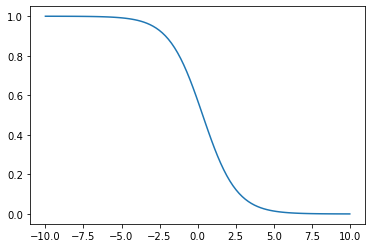

In [23]:
plt.plot(X,Y)
plt.show()

$S_{w_1,w_2}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1+ w_2x_2 + b)}} $

In [24]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1 + np. exp(-(w1*x1 +w2*x2 +b)))

In [25]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [26]:
# learning how to plot 3d plots using matplotlib and also importing a library from matplotlib 'from mpl_toolkits import mplot3d'
# we are using capital lettes to denote vectors
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

# we make a meshgrit because X! and X2 are just computing linearspaces for individual variables but we need to compue a joint grid so that we
# are able to get every possible pair is taken care of.
XX1, XX2 = np.meshgrid(X1,X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)
 

(100,) (100,) (100, 100) (100, 100)


In [34]:
w1 = 1
w2 = -0.5
b = 0
Y  = sigmoid_2d(XX1,XX2, w1, w2, b)

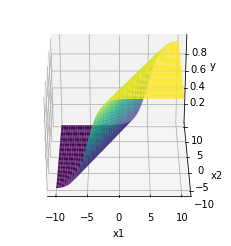

In [35]:
# learning how to use 3d plots in python using matplotlib library
#link for learing the  - https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# the first input is the height at which we are looking from and the second changes the angle in z axis so that we can look at the 3d plots from different angles
ax.view_init(30, 270)

# Compute Loss For a given dataset.


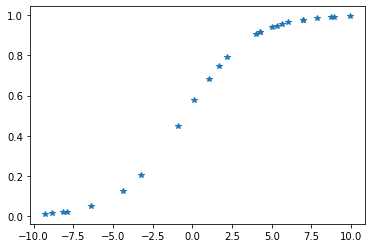

In [42]:
# Working with the 1D example and using the brute force apprach for each case plot the loss, for each value of x, we will be given a series of w and b, 
# we will also have the corresponding y values
# given the input and the output find out the parameters.

#Arbrirary vales to generate data
w_unkown = 0.5
b_unknow = 0.25

#It generates number between -1 and 1 but we want it to genrate so that the number is between -10 and 10 ro the range is 20 and we do 10 so that it averages at 0.
X = np.random.random(25) * 20 - 10 
Y = sigmoid(X, w_unkown, b_unknow)
plt.plot(X, Y, '*')
plt.show()

In [43]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y - sigmoid(x, w_est, b_est))**2 #loss function that we learned Square wrror loss
    return loss

In [44]:
W = np.linspace(-1,1,100)
B = np.linspace(-1,1,100)

WW, BB = np.meshgrid(W,B)

# Loss should be a np.array of the same size as WW and BB
Loss = np.zeros(WW.shape)


In [45]:
WW.shape

(100, 100)

In [47]:
#we are going to iterate throug the 100, 100 in WW and for each such value we are going to compute the loss
for i in range(WW.shape[0]):        #iterate over the rows
    for j in range(WW.shape[1]):    #iterate over the column
        Loss[i,j] = calculate_loss(X, Y, WW[i, j], BB[i, j])
        